In [3]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = scipy.io.loadmat("/disk/scratch/MLPR/Assignment1/amp_data.mat")

In [6]:
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, written by Octave 4.0.0, 2016-10-06 13:09:32 UTC', 'amp_data_info': array(['Converted from https://archive.org/details/Mahler_Symphony_5 -- Mahler Symphony 5, Peabody Symphony Orchestra. Public domain.'],
      dtype='<U125'), 'amp_data': array([[ 0.00000000e+00],
       [-3.05175781e-05],
       [ 6.10351562e-05],
       ...,
       [ 9.15527344e-05],
       [-3.05175781e-05],
       [ 0.00000000e+00]]), '__globals__': [], '__version__': '1.0'}


In [8]:
data = data["amp_data"]

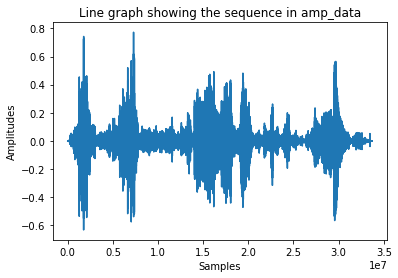

In [12]:
plt.plot(data)
plt.title("Line graph showing the sequence in amp_data")
plt.xlabel("Samples")
plt.ylabel("Amplitudes");

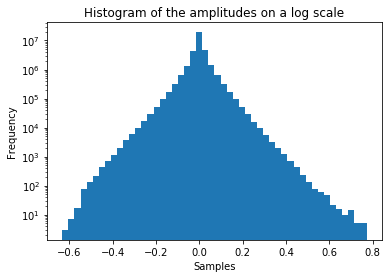

In [20]:
plt.hist(data, bins = 50, log = True)
plt.title("Histogram of the amplitudes on a log scale")
plt.xlabel("Samples")
plt.ylabel("Counts");

In [22]:
print(np.mean(data));

-1.586184047323349e-05


In [23]:
print(np.var(data));

0.0017248868550165787


The data are peaked around zero amplitude, meaning that the majority of the samples are close to zero. The data are fairly symmetric as seen in the histogram plot and the counts drop off quickly either side of zero amplitutde. The data do not appear to follow a Gaussian distribution.

In [27]:
cropped_amp_data = data[0:-(data.shape[0] % 21), :]
print(cropped_amp_data.shape)
data_matrix = cropped_amp_data.reshape((cropped_amp_data.shape[0] // 21, 21));
print(data_matrix.shape)

(33713274, 1)
(1605394, 21)


In [32]:
print(data[:21, 0])
print(data_matrix[0,:])
np.all(data[:21,0]==data_matrix[0,:])

[ 0.00000000e+00 -3.05175781e-05  6.10351562e-05 -6.10351562e-05
  6.10351562e-05 -6.10351562e-05  0.00000000e+00  6.10351562e-05
 -9.15527344e-05  1.22070312e-04 -1.22070312e-04  9.15527344e-05
 -3.05175781e-05 -3.05175781e-05  6.10351562e-05 -6.10351562e-05
  6.10351562e-05 -6.10351562e-05  6.10351562e-05 -6.10351562e-05
  6.10351562e-05]
[ 0.00000000e+00 -3.05175781e-05  6.10351562e-05 -6.10351562e-05
  6.10351562e-05 -6.10351562e-05  0.00000000e+00  6.10351562e-05
 -9.15527344e-05  1.22070312e-04 -1.22070312e-04  9.15527344e-05
 -3.05175781e-05 -3.05175781e-05  6.10351562e-05 -6.10351562e-05
  6.10351562e-05 -6.10351562e-05  6.10351562e-05 -6.10351562e-05
  6.10351562e-05]


True

In [33]:
np.random.seed(123)
perm = np.random.permutation(len(data_matrix))
shuffled_data_matrix = data_matrix[perm]
X, y = shuffled_data_matrix[:, :-1], shuffled_data_matrix[:, -1]

X_shuf_train, y_shuf_train = X[:int(len(X) * 0.7)], y[:int(len(X) * 0.7)]
X_shuf_val, y_shuf_val = X[int(len(X) * 0.7):int(len(X) * 0.85)], y[int(len(X) * 0.7):int(len(X) * 0.85)]
X_shuf_test, y_shuf_test = X[int(len(X) * 0.85):], y[int(len(X) * 0.85):]

print(X_shuf_train.shape, y_shuf_train.shape)
print(X_shuf_val.shape, y_shuf_val.shape)
print(X_shuf_test.shape, y_shuf_test.shape)

(1123775, 20) (1123775,)
(240809, 20) (240809,)
(240810, 20) (240810,)


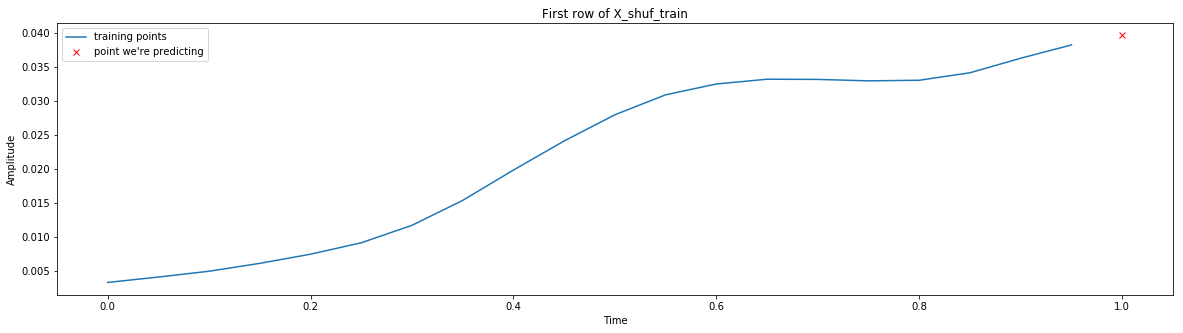

In [34]:
plt.figure(figsize=(20, 5));
plt.plot(np.arange(20) / 20, X_shuf_train[0, :], label='training points');
plt.plot(1, y[0], 'rx', label="point we're predicting")
plt.title('First row of X_shuf_train');
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.legend();

In [57]:
first_row_X = X_shuf_train[0, :]
first_row_y = y[0]
time_values = np.arange(20) / 20
w = np.linalg.lstsq(time_values[:, None], first_row_X[:, None], rcond=False)[0]
print(w)

[[0.04491298]]


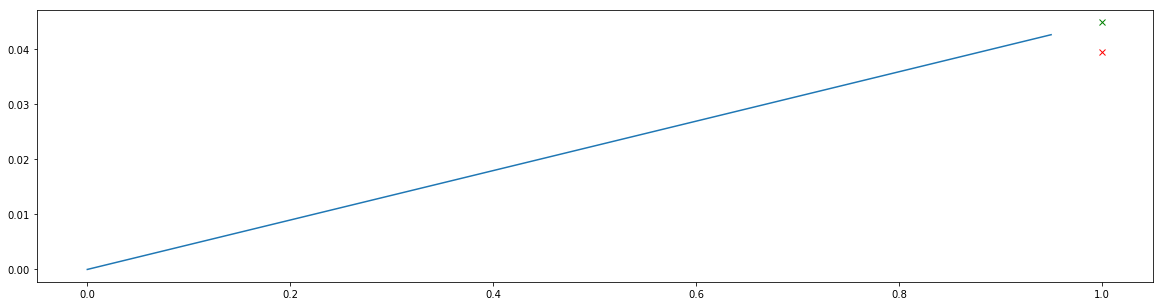

In [62]:
plt.figure(figsize=(20, 5));
plt.plot(time_values, time_values[:, None] * w, label='training points');
plt.plot(1, y[0], 'rx', label="point we're predicting")
plt.plot(1, w, 'gx', label="point we've predicted")

In [72]:
A = np.vstack([np.ones(len(time_values)), [time_values]]).T
A

array([[1.  , 0.  ],
       [1.  , 0.05],
       [1.  , 0.1 ],
       [1.  , 0.15],
       [1.  , 0.2 ],
       [1.  , 0.25],
       [1.  , 0.3 ],
       [1.  , 0.35],
       [1.  , 0.4 ],
       [1.  , 0.45],
       [1.  , 0.5 ],
       [1.  , 0.55],
       [1.  , 0.6 ],
       [1.  , 0.65],
       [1.  , 0.7 ],
       [1.  , 0.75],
       [1.  , 0.8 ],
       [1.  , 0.85],
       [1.  , 0.9 ],
       [1.  , 0.95]])

In [74]:
b, w = np.linalg.lstsq(A, first_row_X[:, None], rcond=False)[0]
print(b, w)

[0.00217503] [0.04156678]


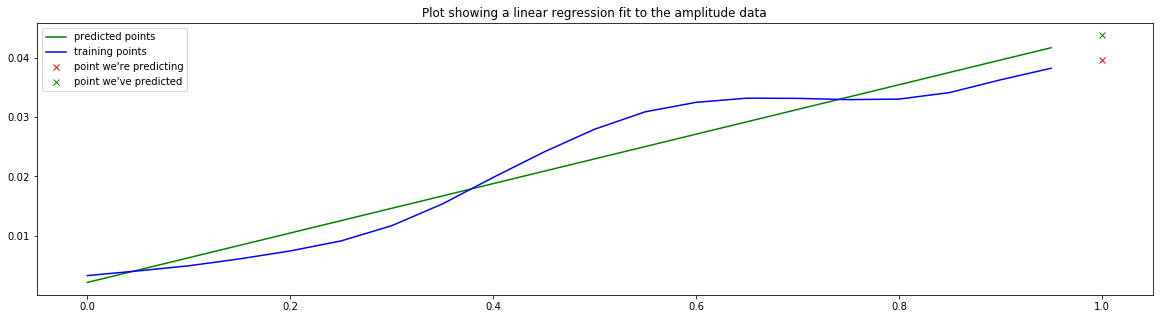

In [86]:
plt.figure(figsize=(20, 5));
plt.plot(time_values, time_values[:, None] * w + b, 'g-', label='predicted points');
plt.plot(np.arange(20) / 20, X_shuf_train[0, :], 'b-', label='training points');
plt.plot(1, y[0], 'rx', label="point we're predicting")
plt.plot(1, w + b, 'gx', label="point we've predicted")
plt.title("Plot showing a linear regression fit to the amplitude data")
plt.legend();

In [90]:
B = np.vstack([np.ones(len(time_values)), [time_values], [time_values**2], [time_values**3], [time_values**4]]).T
B

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 5.0000000e-02, 2.5000000e-03, 1.2500000e-04,
        6.2500000e-06],
       [1.0000000e+00, 1.0000000e-01, 1.0000000e-02, 1.0000000e-03,
        1.0000000e-04],
       [1.0000000e+00, 1.5000000e-01, 2.2500000e-02, 3.3750000e-03,
        5.0625000e-04],
       [1.0000000e+00, 2.0000000e-01, 4.0000000e-02, 8.0000000e-03,
        1.6000000e-03],
       [1.0000000e+00, 2.5000000e-01, 6.2500000e-02, 1.5625000e-02,
        3.9062500e-03],
       [1.0000000e+00, 3.0000000e-01, 9.0000000e-02, 2.7000000e-02,
        8.1000000e-03],
       [1.0000000e+00, 3.5000000e-01, 1.2250000e-01, 4.2875000e-02,
        1.5006250e-02],
       [1.0000000e+00, 4.0000000e-01, 1.6000000e-01, 6.4000000e-02,
        2.5600000e-02],
       [1.0000000e+00, 4.5000000e-01, 2.0250000e-01, 9.1125000e-02,
        4.1006250e-02],
       [1.0000000e+00, 5.0000000e-01, 2.5000000e-01, 1.2500000e-01,
        6.25

In [91]:
b, w1, w2, w3, w4 = np.linalg.lstsq(B, first_row_X[:, None], rcond=False)[0]
print(b, w1, w2, w3, w4)

[0.00516571] [-0.06133125] [0.48128764] [-0.70275317] [0.31761369]


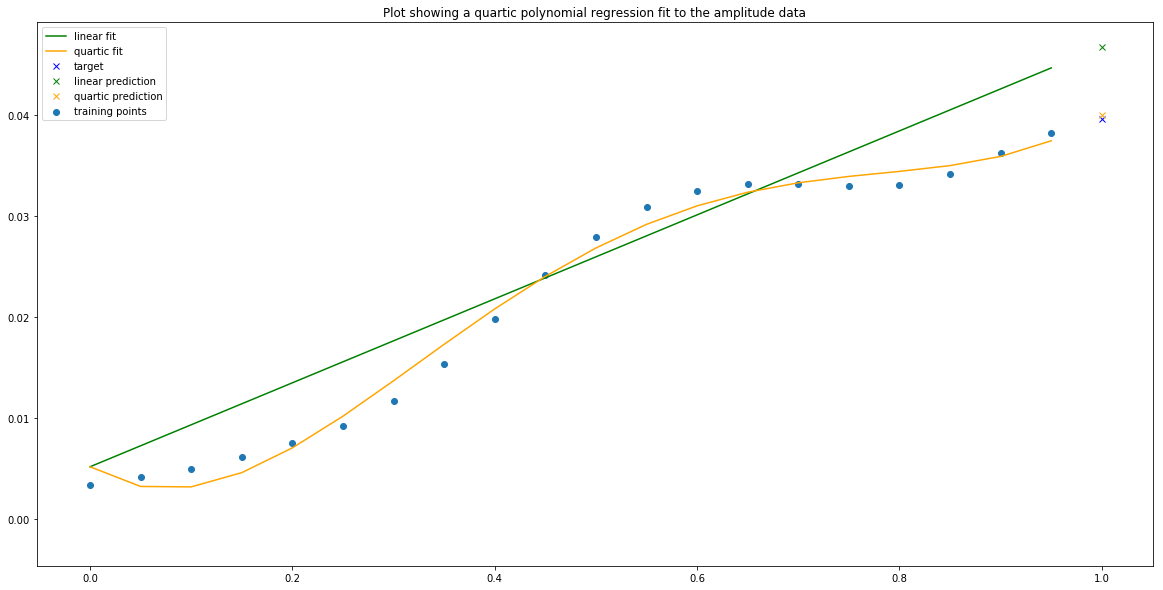

In [102]:
plt.figure(figsize=(20, 10));
plt.scatter(np.arange(20) / 20, X_shuf_train[0, :], label='training points');
plt.plot(time_values, time_values[:, None] * w + b, 'g-', label='linear fit');
plt.plot(time_values, b + time_values[:, None] * w1 + (time_values**2)[:, None] * w2 + (time_values**3)[:, None] * w3 
         + (time_values**4)[:, None] * w4, '-', color = "orange", label='quartic fit');
plt.plot(1, y[0], 'bx', label="target")
plt.plot(1, w + b, 'gx', label="linear prediction")
plt.plot(1, b + w1 + w2 + w3 + w4, 'x', color = "orange", label="quartic prediction")
plt.title("Plot showing a quartic polynomial regression fit to the amplitude data")
plt.legend();